# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

# Variables
There are 14 attributes in each case of the dataset. They are:

0. CRIM - per capita crime rate by town
1. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS - proportion of non-retail business acres per town.
3. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
4. NOX - nitric oxides concentration (parts per 10 million)
5. RM - average number of rooms per dwelling
6. AGE - proportion of owner-occupied units built prior to 1940
7. DIS - weighted distances to five Boston employment centres
8. RAD - index of accessibility to radial highways
9. TAX - full-value property-tax rate per dollar 10,000
10. PTRATIO - pupil-teacher ratio by town
11. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12. LSTAT - % lower status of the population
13. MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
import pickle

# Feature Engineering

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
l = boston.feature_names
n = list(range(13))
d = dict(zip(n,l))

Renaming the columns for better understanding of the data

In [5]:
bos.rename(d,axis = 1,inplace = True)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# Checking for any skewness

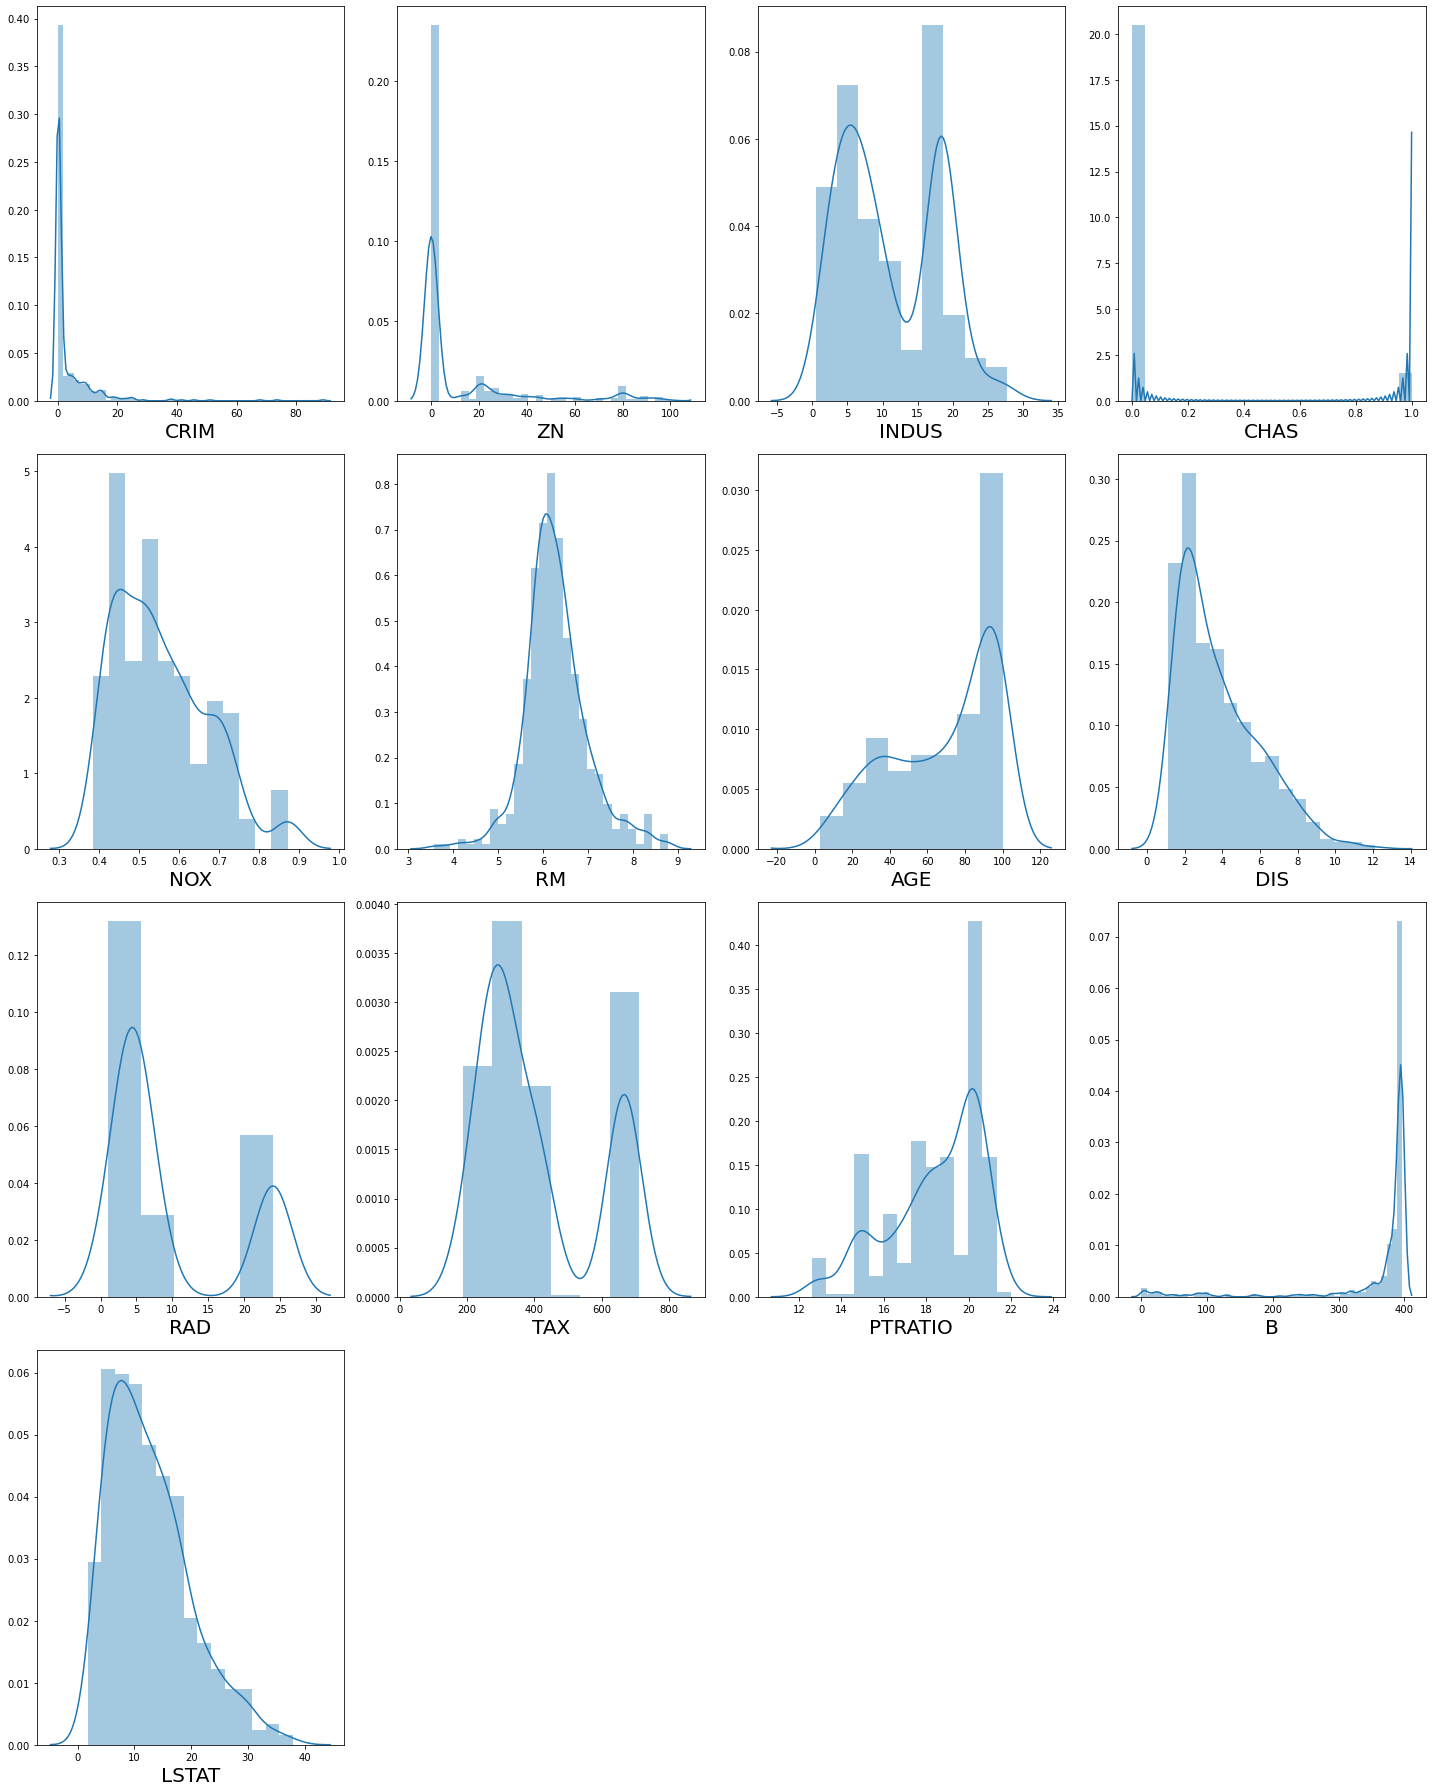

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* There is some skewness with some of the features in the dataset. Since there are no null values we do not have to worry much about this.
* Age is left skewed in this case and DIS,crime_rate,ZN are right skewed. If right skewed then the mean>median and vice versa.

In [9]:
bos_col = bos.copy()
bos_col['target'] = boston.target
bos_col.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Summary Stats

In [10]:
ol = smf.ols(formula = 'target ~ CRIM + ZN + INDUS + CHAS + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
        data = bos_col).fit()
ol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sat, 14 Nov 2020   Prob (F-statistic):          2.27e-131
Time:                        11:10:13   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5000      4.364      5.385      0.000      14.925      32.075
CRIM          -0.0989      0.033     -2.953      0.003      -0.165      -0.033
ZN             0.0487      0.014      3.478      0.001       0.021       0.076
INDUS         -0.0549      0.061     -0.908      0.365      -0.174       0.064
CHAS           2.5523      0.879      2.904      0.004       0.825       4.279
RM             3.9916      0.425      9.398      0.000       3.157       4.826
AGE           -0.0156      0.013     -1.200      0.231      -0.041       0.010
DIS           -1.2140      0.195     -6.215      0.000      -1.598      -0.830
RAD            0.2622      0.067      3.911      0.000       0.130       0.394
TAX           -0.0136      0.004     -3.563      0.000      -0.021      -0.006
PTRATIO       -0.7522      0.126     -5.966      0.000      -1.000      -0.504
B              0.0102      0.003      3.748      0.000       0.005       0.016
LSTAT         -0.5410      0.052    -10.475      0.000      -0.642      -0.440
==============================================================================
Omnibus:                      187.822   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              911.054
Skew:                           1.577   Prob(JB):                    1.47e-198
Kurtosis:                       8.767   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Checking for multi-collinearity

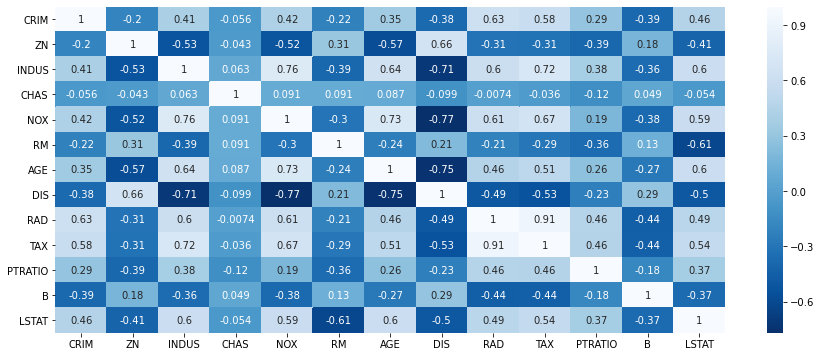

In [11]:
plt.figure(figsize = (15,6))
sns.heatmap(bos.corr(),annot = True,cmap = 'Blues_r')
plt.show()

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bos)

In [13]:
new_df = pd.DataFrame(X_scaled)
new_df.rename(d,axis = 1,inplace = True)
new_df.drop(['RAD','TAX'],axis = 1,inplace = True)

In [14]:
new_df['target'] = boston.target

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['features'] = boston.feature_names

In [16]:
vif

,VIF,features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


If VIF is greater than 5 then we have severe colinearity. We see RAD and TAX to have severe colinearity based on their VIF factor

In [17]:
ol = smf.ols(formula = 'target ~ CRIM + ZN + INDUS + CHAS + RM + AGE + DIS + PTRATIO + B + LSTAT',
        data = new_df).fit()
ol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     127.7
Date:                Sat, 14 Nov 2020   Prob (F-statistic):          3.91e-130
Time:                        11:10:15   Log-Likelihood:                -1517.7
No. Observations:                 506   AIC:                             3057.
Df Residuals:                     495   BIC:                             3104.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.218    103.222      0.000      22.104      22.962
CRIM          -0.6203      0.264     -2.347      0.019      -1.140      -0.101
ZN             0.9425      0.320      2.942      0.003       0.313       1.572
INDUS         -0.9162      0.358     -2.562      0.011      -1.619      -0.214
CHAS           0.7537      0.224      3.359      0.001       0.313       1.195
RM             2.9603      0.298      9.922      0.000       2.374       3.546
AGE           -0.5039      0.370     -1.361      0.174      -1.231       0.223
DIS           -2.6251      0.414     -6.335      0.000      -3.439      -1.811
PTRATIO       -1.5204      0.260     -5.843      0.000      -2.032      -1.009
B              0.8815      0.248      3.552      0.000       0.394       1.369
LSTAT         -3.8045      0.373    -10.208      0.000      -4.537      -3.072
==============================================================================
Omnibus:                      191.278   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              957.891
Skew:                           1.598   Prob(JB):                    9.92e-209
Kurtosis:                       8.934   Cond. No.                         4.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Previously we were getting a very large condition number which indicated strong multicolinearity. After removing the TAX and RAD columns this number has reduced eliminating any multicolinearity in the dataset.
* Reducing number of features can cause a reduction in adjusted R^2 value.
* In the above summary we also see that the p-value for age is above our 0.05 threshold which means that age could be corelated with our target variable.
* We will get rid of the age feature due to the above reason
* Overall kurtosis of the dataset is leptokurtic which means overall dataset distribution is longer and tails are flatter.

In [18]:
new_df.drop('AGE',axis = 1,inplace = True)

In [19]:
X = new_df.drop('target',axis = 1)
y = new_df['target']

# Model creation

In [20]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1487)

In [21]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lm.score(x_test,y_test)

0.7881339168349393

In [23]:
lm.score(X_train,y_train)

0.7065076097423599

In [24]:
def adj_r2(x,y):
    r2 = lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [25]:
adj_r2(x_test,y_test)

0.7648519296739436

* Adjusted r2 is a better metric to use when we have many independent variables because it also takes number of features and datapoints into consideration.

# Checking for overfitting using Ridge and Lasso Regression models

##### Lasso Regression model

In [26]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [27]:
alpha = lasscv.alpha_
alpha

0.0013220626813299765

In [28]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0013220626813299765, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
lasso_reg.score(x_test, y_test)

0.7881440882654366

In [30]:
lasso_reg.score(X_train, y_train)

0.7065072366091408

our r2_score for test data (78.81%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.
1

##### Ridge regression model

In [31]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([6.99481766, 5.00742565, 8.91807949, 9.59510933, 6.19399477,
       8.84903322, 3.1164533 , 5.87350243, 0.19425142, 8.27697611,
       1.54404563, 8.43175369, 9.41418122, 4.02902144, 9.7822668 ,
       9.82065867, 0.35236754, 4.49878399, 8.06556922, 5.49929786,
       8.87684022, 8.85238382, 3.67661413, 1.72318496, 2.47528212,
       1.62746027, 4.20385623, 4.04113423, 3.71979906, 1.43300059,
       4.29092541, 8.71674276, 0.04377355, 1.47744836, 8.56134193,
       9.76042801, 5.11013653, 0.7940757 , 6.20566648, 1.93986874,
       3.79643663, 0.43735039, 3.83088039, 9.24076691, 9.14944616,
       6.69465235, 4.85193439, 0.75769525, 4.69305569, 4.62211145]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [32]:
ridgecv.alpha_

0.043773550024154284

In [33]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.043773550024154284, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

In [34]:
ridge_model.score(x_test, y_test)

0.7881374032131186

In [35]:
ridge_model.score(X_train, y_train)

0.7065075961550006

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [36]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [37]:
elasticCV.alpha_

0.0307769104269004

In [38]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [39]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.0307769104269004, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [40]:
elasticnet_reg.score(x_test, y_test)

0.7880777856786013

In [41]:
elasticnet_reg.score(X_train, y_train)

0.7060520266379069

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

|Type|train_Score_r2|test_score_r2|
|--|--|---|
|Linear Rigression|70.65|78.81|
|Lasso Rigression|70.65|78.81|
|Ridge Rigression|70.65|78.81|
|Elasticnet|70.60|78.80|


# Making Predictions

In [42]:
filename = 'assignment_models/final_model.pickle'
pickle.dump(lasso_reg, open(filename, 'wb'))

In [43]:
model_load = pickle.load(open('assignment_models/final_model.pickle','rb'))

In [44]:
result = pd.DataFrame()
result['actual'] = y_test
result['predicted'] = model_load.predict(x_test)
result.head()

,actual,predicted
194,29.1,31.581444
6,22.9,22.063979
209,20.0,17.430162
422,20.8,17.825047
348,24.5,27.270700


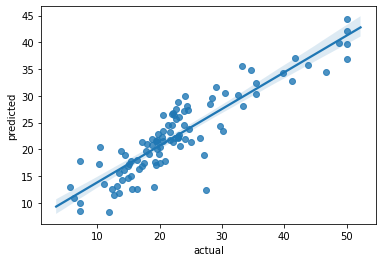

In [45]:
sns.regplot(result['actual'],result['predicted'])
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()